In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

In [5]:
df = pd.read_csv('bank.csv', sep=',')

In [6]:
df.drop(columns='poutcome', inplace=True)

In [7]:
df['convert'] = [randint(0,1) for i in range(11162)]

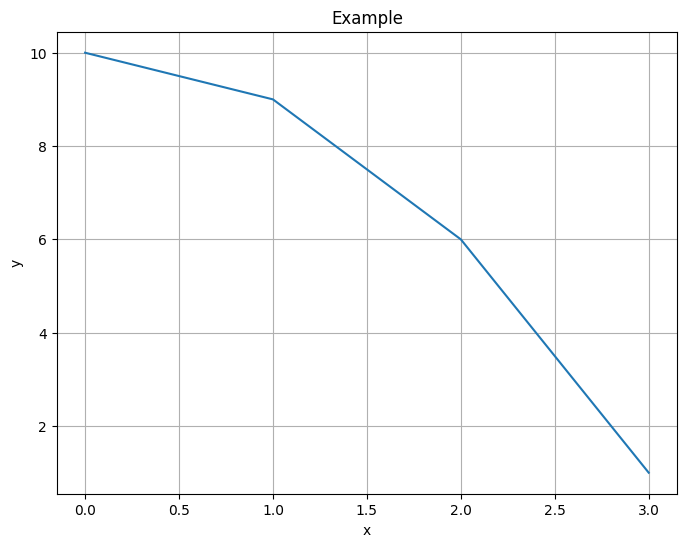

In [8]:
plt.figure(figsize=(8,6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid()

In [9]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head(10)

,month,count
0,apr,923
1,aug,1519
2,dec,110
3,feb,776
4,jan,344
5,jul,1514
6,jun,1222
7,mar,276
8,may,2824
9,nov,943


## Линейный

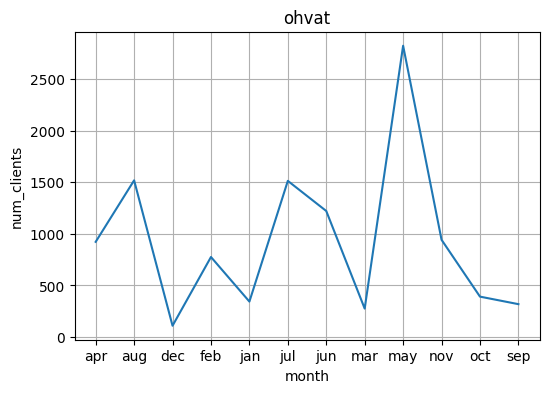

In [10]:
plt.figure(figsize=(6,4))
plt.plot(data['month'], data['count'])
plt.title('ohvat')
plt.xlabel('month')
plt.ylabel('num_clients')
plt.grid()

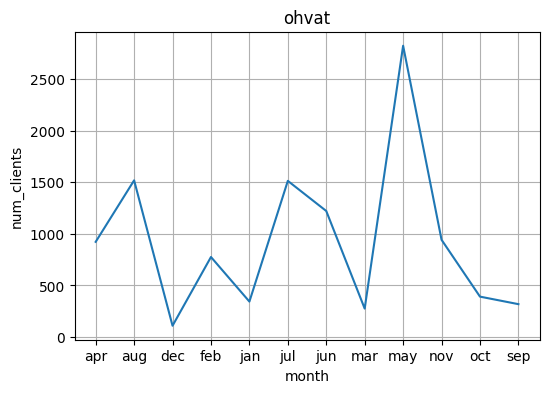

In [11]:
plt.figure(figsize=(6,4))
sns.lineplot(x=data['month'], y=data['count'])
plt.title('ohvat')
plt.xlabel('month')
plt.ylabel('num_clients')
plt.grid()

## Гистограмма

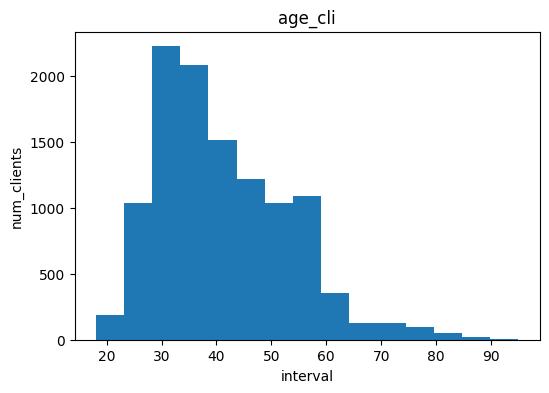

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=15)
plt.title('age_cli')
plt.xlabel('interval')
plt.ylabel('num_clients');

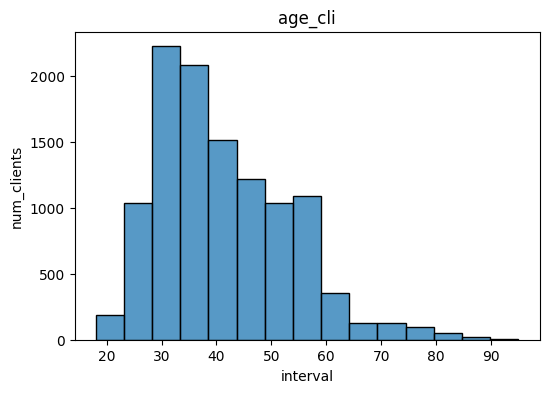

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=15)
plt.title('age_cli')
plt.xlabel('interval')
plt.ylabel('num_clients');

In [14]:
data_1 = df.groupby('age')['convert'].sum().reset_index()

## Диаграмма рассеяния

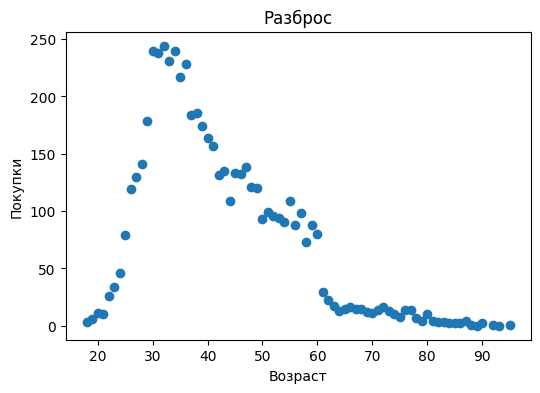

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(data_1['age'], data_1['convert'])

plt.title('Разброс')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

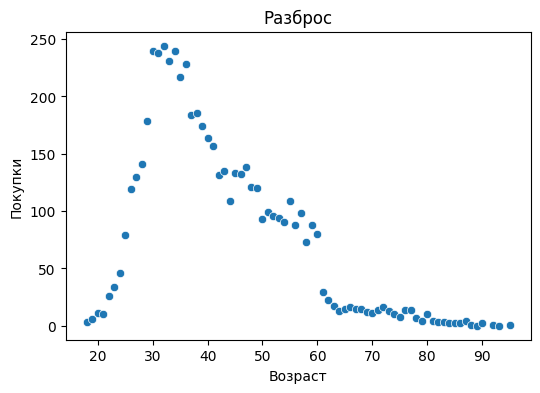

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data_1['age'], y=data_1['convert'])

plt.title('Разброс')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

## Столбчатые диаграммы

In [17]:
data_2 = df['job'].value_counts().reset_index()

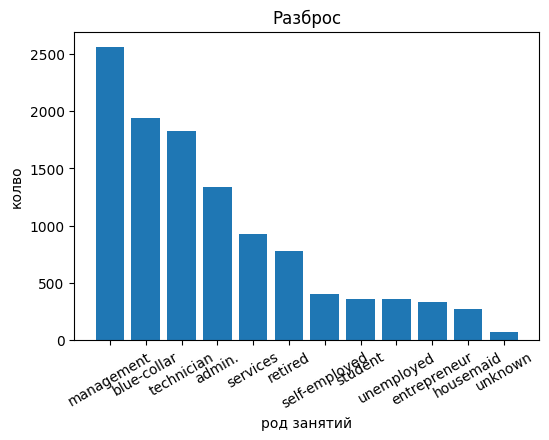

In [18]:
plt.figure(figsize=(6,4))
plt.bar(data_2['job'], data_2['count'])

plt.title('Разброс')
plt.xlabel('род занятий')
plt.ylabel('колво');
plt.xticks(rotation=30);

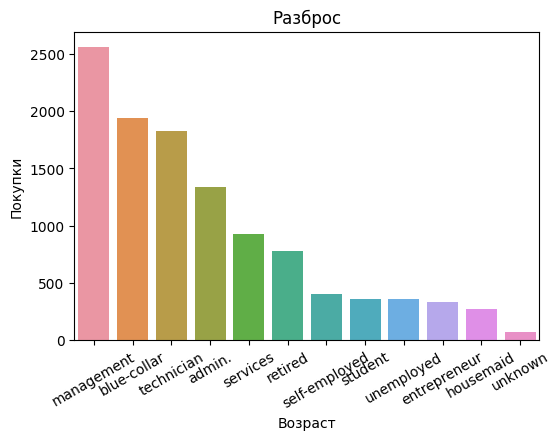

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x=data_2['job'], y=data_2['count'])

plt.title('Разброс')
plt.xlabel('Возраст')
plt.ylabel('Покупки');
plt.xticks(rotation=30);

In [20]:
data3 = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data3.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data3.head()

convert,job,no,yes
4,management,1270,1296
1,blue-collar,960,984
9,technician,907,916
0,admin.,680,654
7,services,448,475


## Многорядовые столбчатые диаграммы

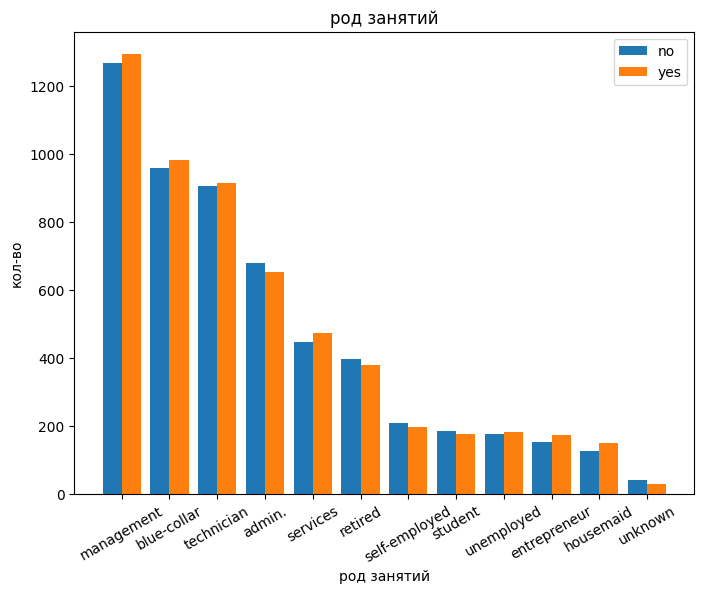

In [21]:
plt.figure(figsize=(8,6))
n_ticks = np.arange(len(data3['no']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data3['no'], width=w)
plt.bar(n_ticks + offset, data3['yes'], width=w)
plt.title('род занятий')
plt.xlabel('род занятий')
plt.ylabel('кол-во')
plt.legend(['no','yes'])
plt.xticks(n_ticks, data3['job'], rotation=30);

## Сложенная столбчатая диаграмма

In [22]:
data4 = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0,ascending=False)
data4.rename(columns={0 : 'no', 1 : 'yes'}, inplace=True)
data4.head()

convert,job,no,yes
11,unknown,0.600000,0.400000
8,student,0.513889,0.486111
6,self-employed,0.513580,0.486420
5,retired,0.511568,0.488432
0,admin.,0.509745,0.490255


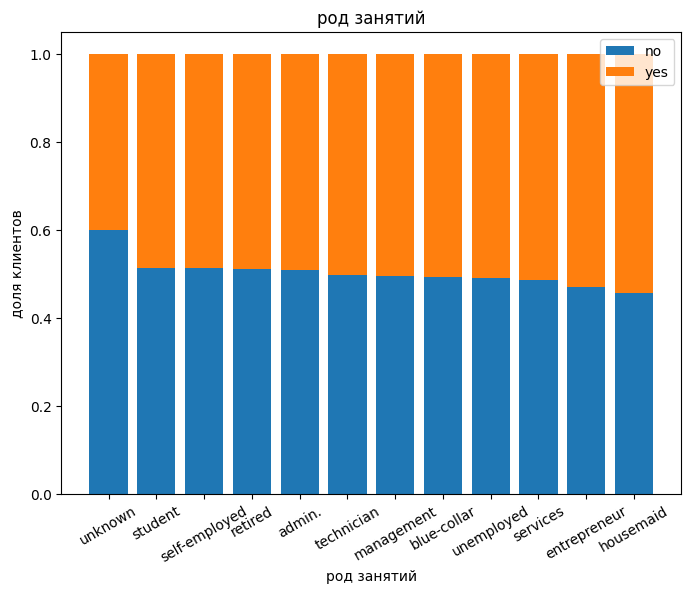

In [23]:
plt.figure(figsize=(8,6))

plt.bar(data4['job'], data4['no'])
plt.bar(data4['job'], data4['yes'], bottom=data4['no'])

plt.title('род занятий')
plt.xlabel('род занятий')
plt.ylabel('доля клиентов')
plt.legend(['no','yes'])
plt.xticks(rotation=30);

## Ящики с усами

In [24]:
data_a1 = df['duration'][df['convert'] == 1]
data_a2 = df['duration'][df['convert'] == 0]
data_a1.head()

3      579
4      673
5      562
7     1030
10     786
Name: duration, dtype: int64

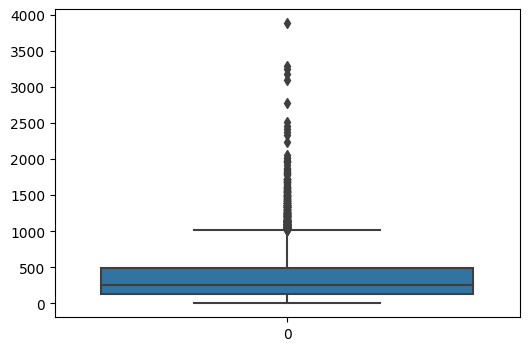

In [25]:
plt.figure(figsize=(6,4))

sns.boxplot(data=[data_a1]);

<Axes: xlabel='duration', ylabel='Count'>

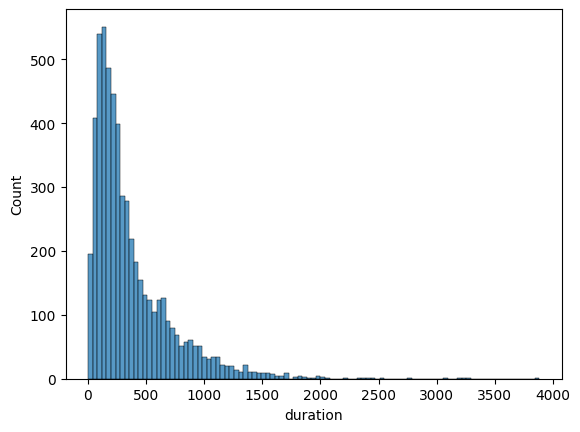

In [26]:
sns.histplot(x=data_a1)

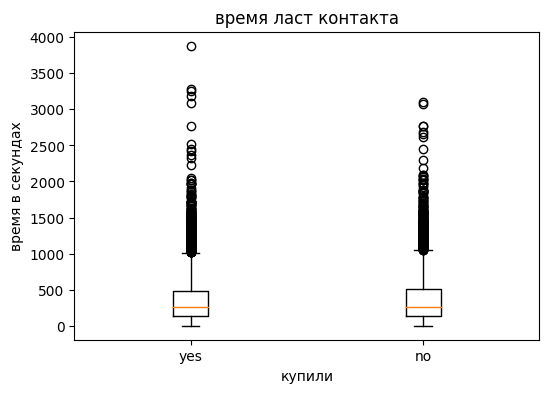

In [27]:
# boxplot
plt.figure(figsize=(6,4))

plt.boxplot([data_a1, data_a2])

plt.title('время ласт контакта')
plt.xlabel('купили')
plt.ylabel('время в секундах')
plt.xticks([1,2],['yes','no']);

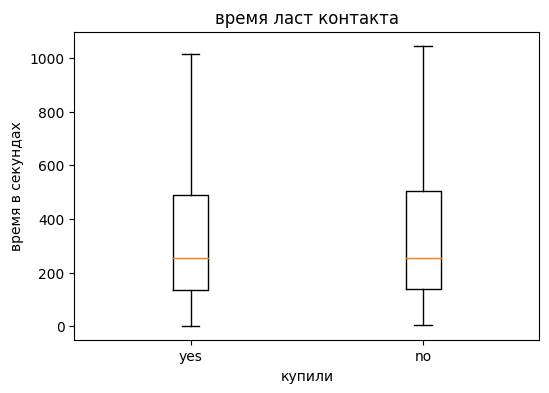

In [28]:
# boxplot без выбросов

plt.figure(figsize=(6,4))

plt.boxplot([data_a1, data_a2], showfliers=False)

plt.title('время ласт контакта')
plt.xlabel('купили')
plt.ylabel('время в секундах')
plt.xticks([1,2],['yes','no']);

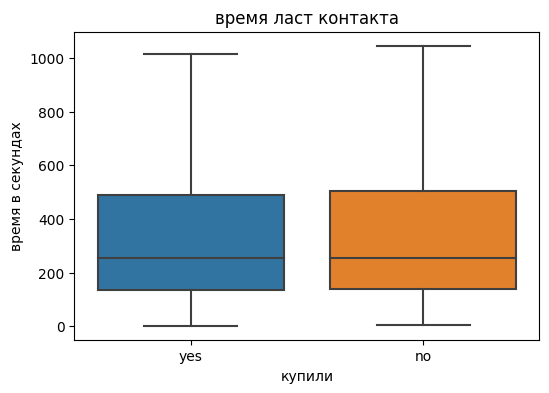

In [29]:
plt.figure(figsize=(6,4))

sns.boxplot(data=[data_a1, data_a2], showfliers=False)

plt.title('время ласт контакта')
plt.xlabel('купили')
plt.ylabel('время в секундах')
plt.xticks([0,1],['yes','no']);

## Круговая диаграмма

In [30]:
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     5610
yes    5552
Name: count, dtype: int64

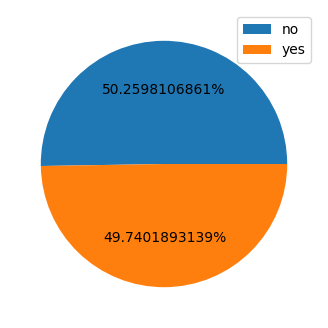

In [31]:
plt.figure(figsize=(6,4))

plt.pie(data,autopct='%1.10f%%')

plt.legend(data.index);

# Визуальный анализ данных

In [32]:
ds = pd.read_csv('housing.csv')
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


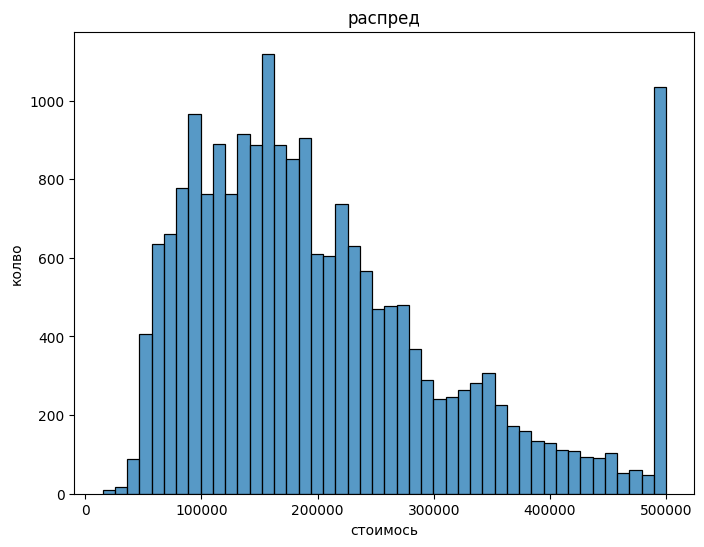

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(ds['median_house_value'])

plt.title('распред')
plt.xlabel('стоимось')
plt.ylabel('колво');

In [34]:
ds_num_features = ds.select_dtypes(include=['float64', 'float32', 'float16'])
ds_num_features.drop('median_house_value', axis=1, inplace=True)

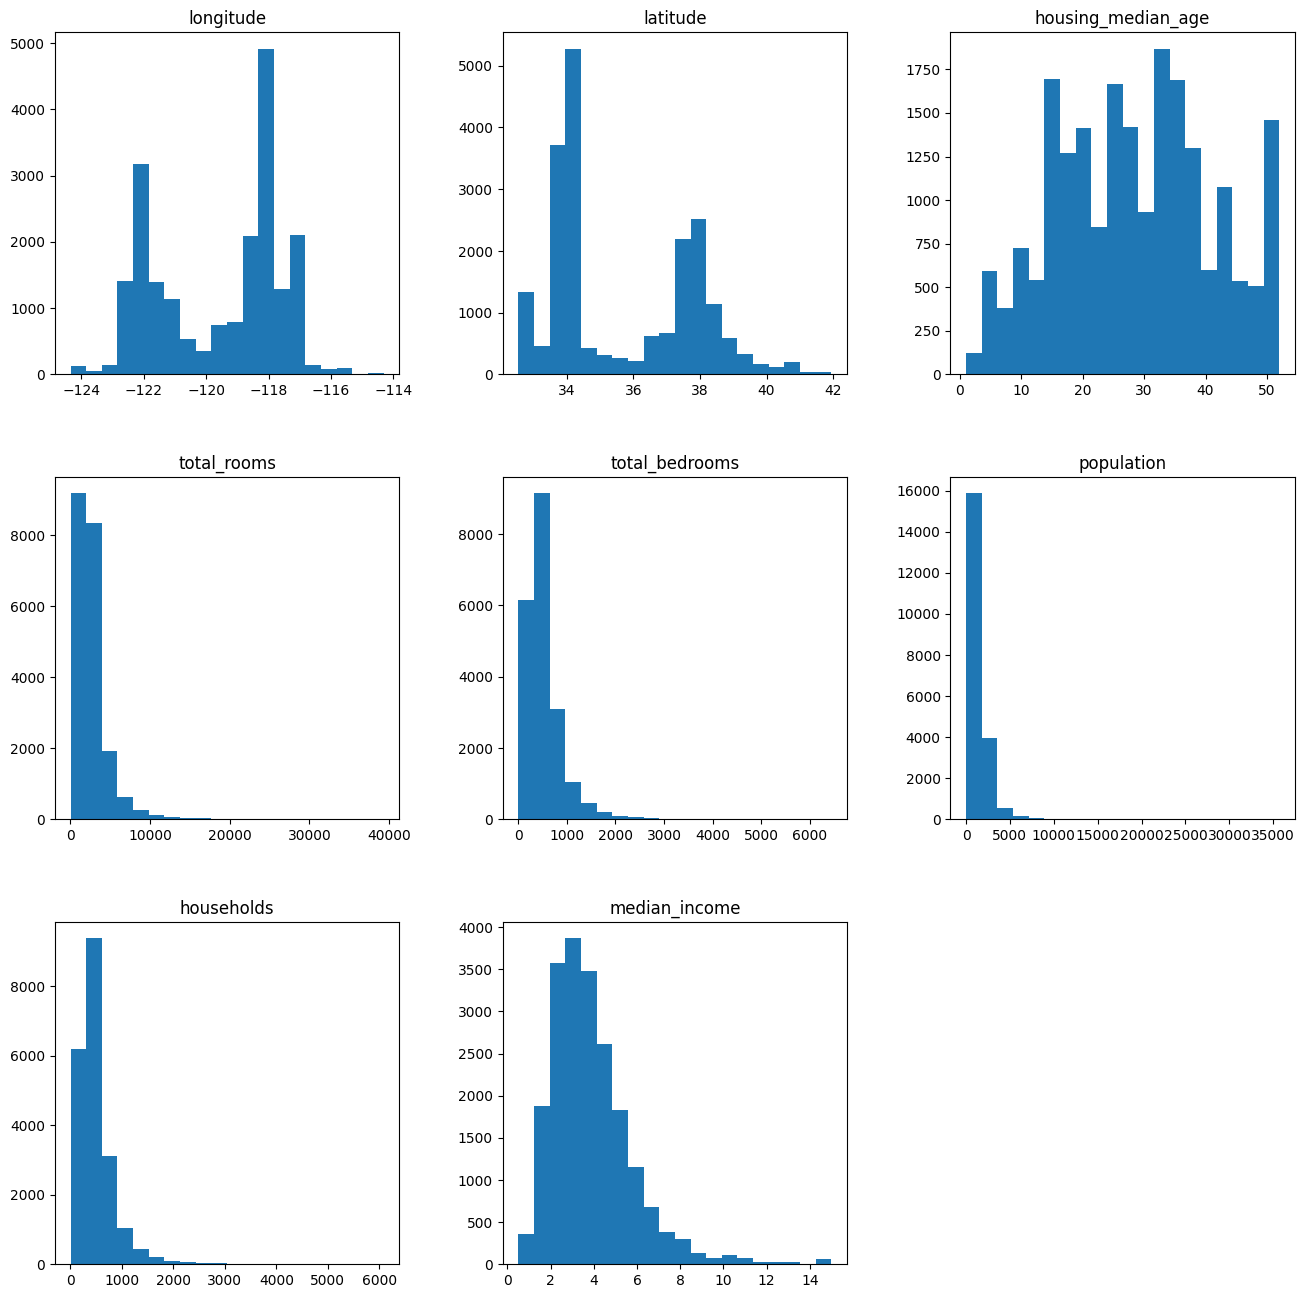

In [35]:
ds_num_features.hist(figsize=(16, 16), bins=20, grid=False);

## Поиск выбросов с boxplot

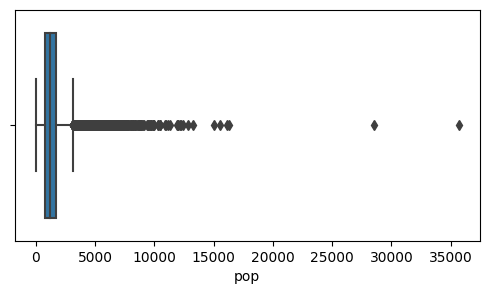

In [36]:
plt.figure(figsize=(6,3))

sns.boxplot(x=ds['population'], whis=1.5)
plt.xlabel('pop')
plt.show()

## Анализ категорийных признаков

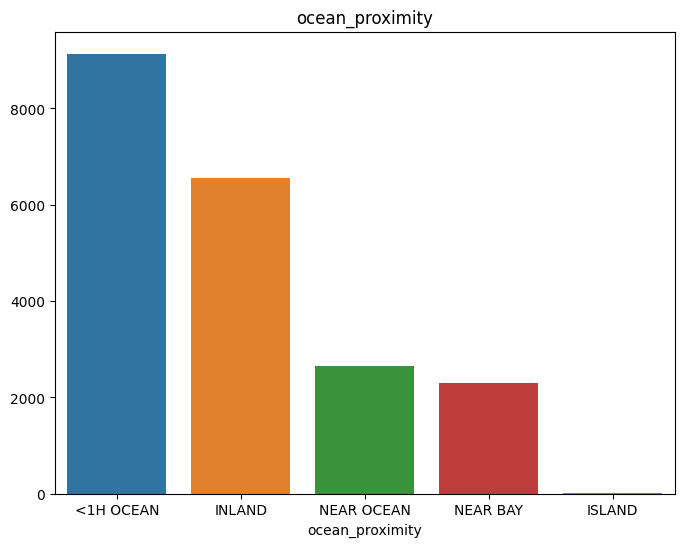

In [37]:
counts = ds['ocean_proximity'].value_counts()

plt.figure(figsize=(8,6))
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

## Анализ взаимных распределений

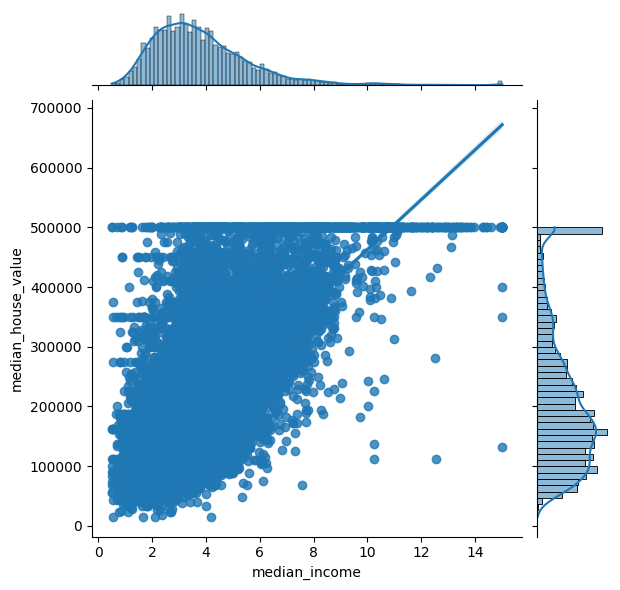

In [38]:
sns.jointplot(x=ds['median_income'], y=ds['median_house_value'], kind='reg');

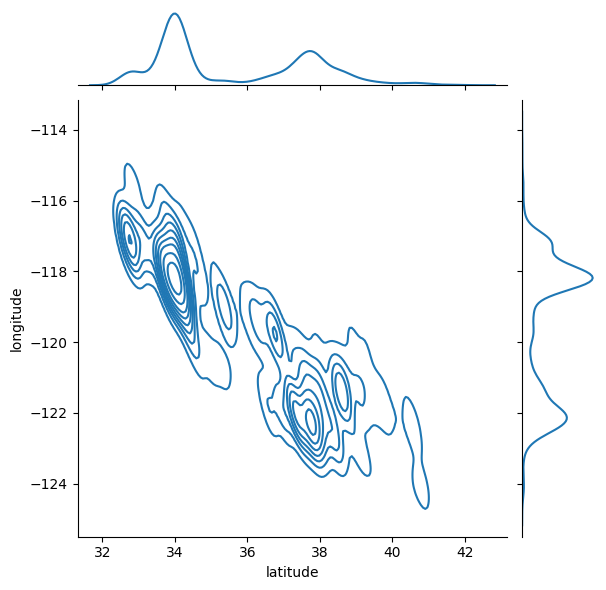

In [39]:
sns.jointplot(x=ds['latitude'], y=ds['longitude'], kind='kde');

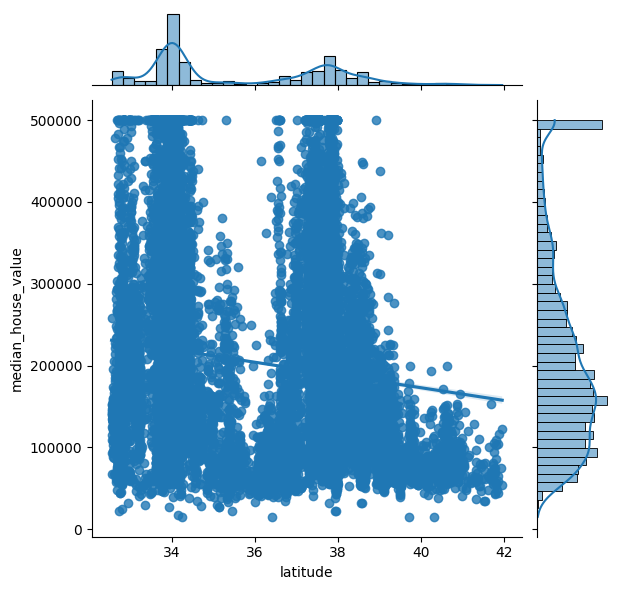

In [40]:
sns.jointplot(x=ds['latitude'], y=ds['median_house_value'], kind='reg');

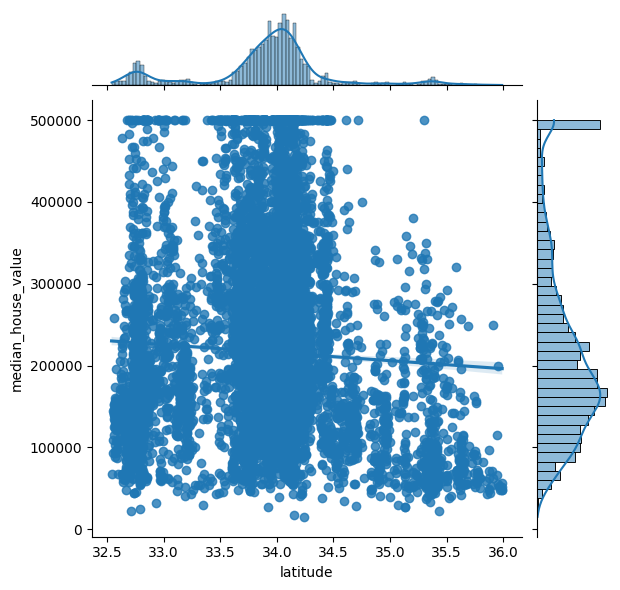

In [41]:
df_cut = ds[ds['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

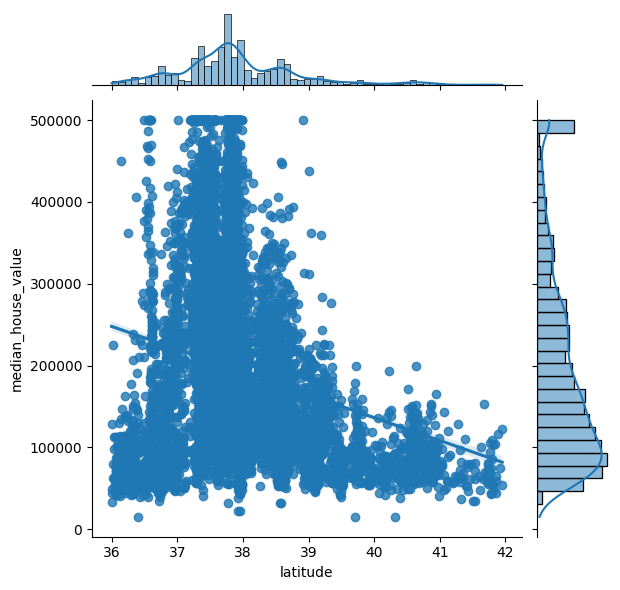

In [42]:
df_cut = ds[ds['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

## Категорийные - бинарные признаки

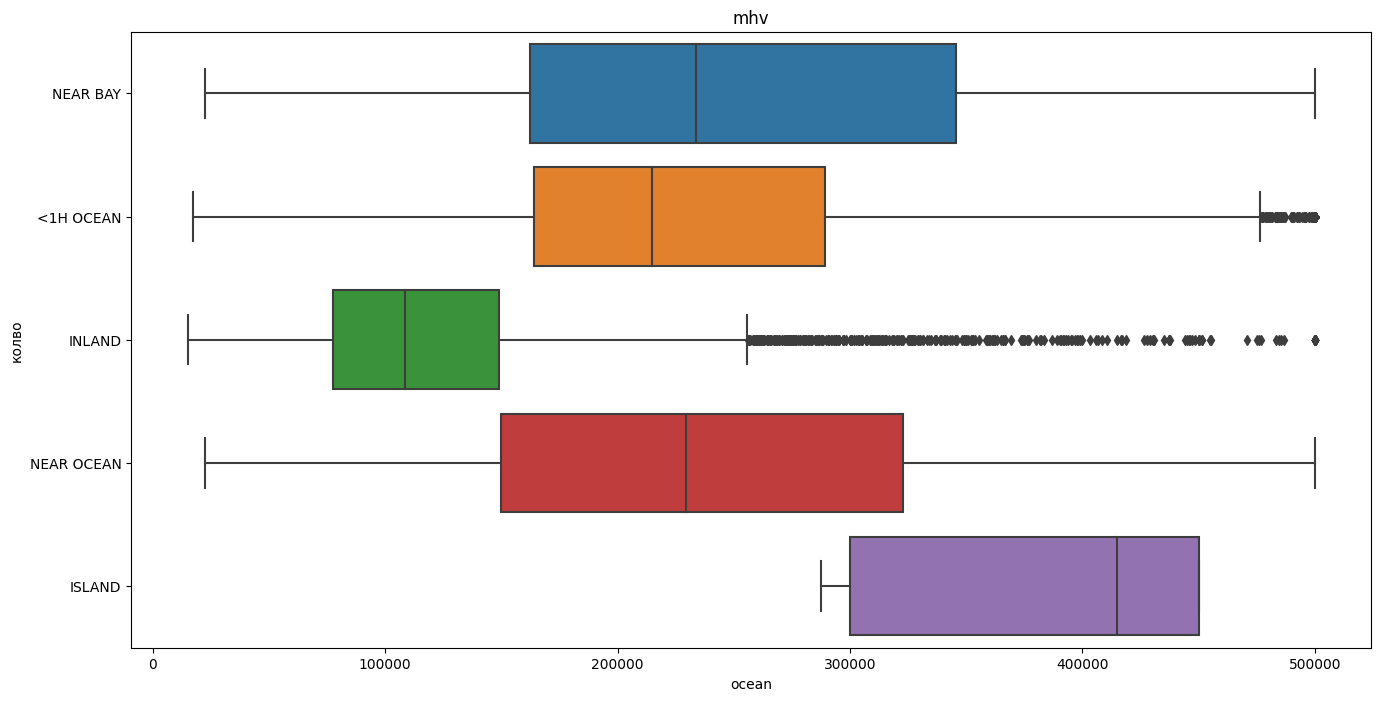

In [43]:
plt.figure(figsize=(16,8))

sns.boxplot(x=ds['median_house_value'], y=ds['ocean_proximity'], whis=1.5)
plt.title('mhv')
plt.xlabel('ocean')
plt.ylabel('колво');

## Матрица корреляций

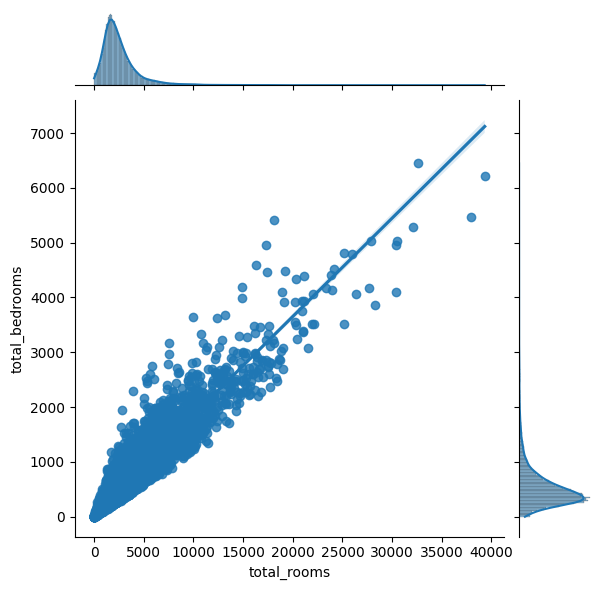

In [44]:
sns.jointplot(x=ds['total_rooms'], y=ds['total_bedrooms'], kind='reg');

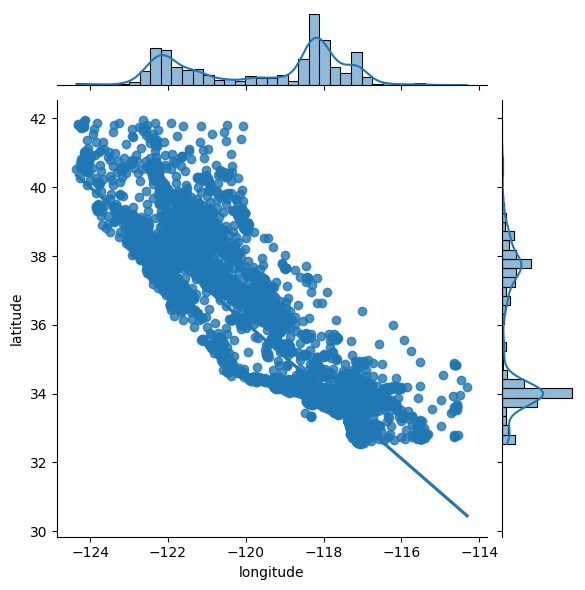

In [45]:
sns.jointplot(x=ds['longitude'], y=ds['latitude'], kind='reg');

In [46]:
corr_matrix = ds_num_features.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0
latitude,-0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0
housing_median_age,0.0,0.0,1.0,-0.4,-0.3,-0.3,-0.3,0.0
total_rooms,0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.0
total_bedrooms,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0
population,0.0,0.0,-0.3,0.9,0.9,1.0,0.9,0.0
households,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0
median_income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


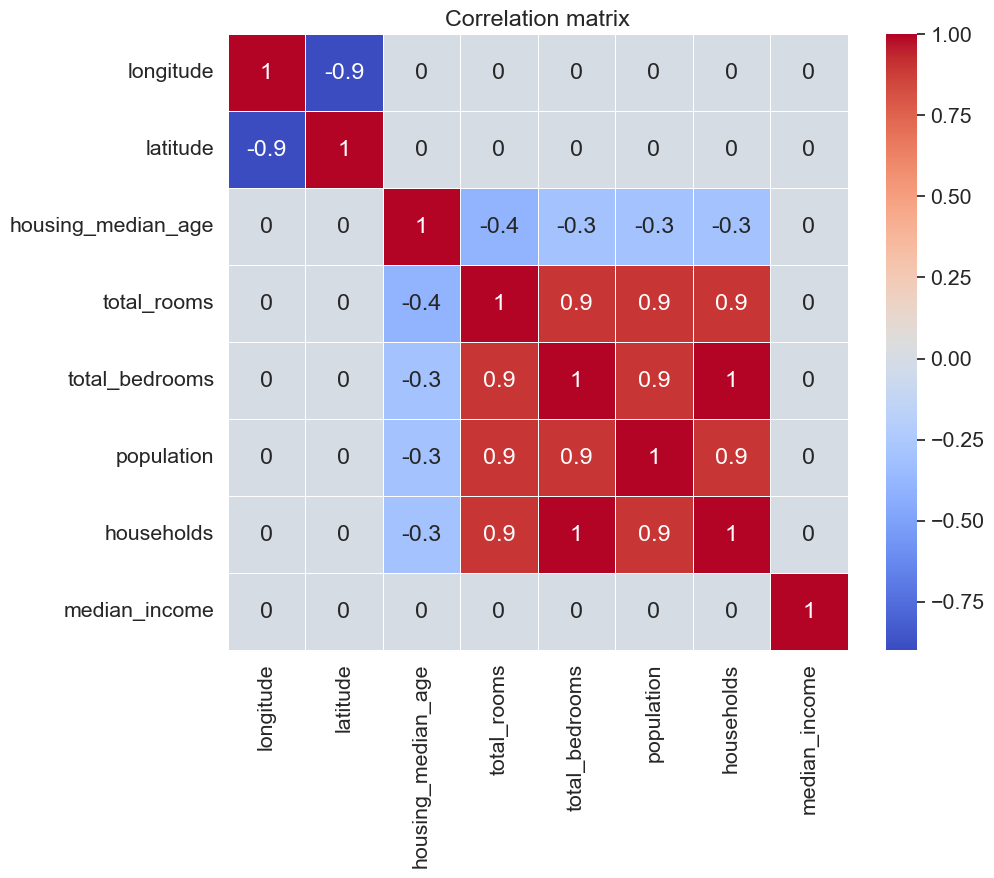

In [47]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

## Геоданные

In [48]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

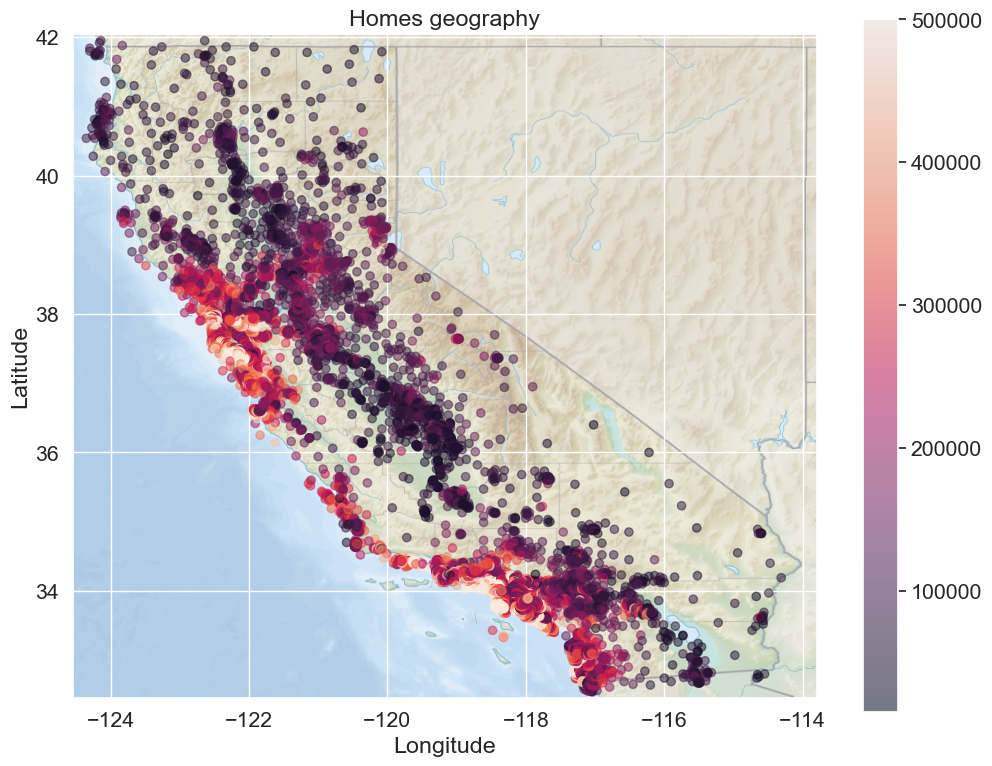

In [67]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(ds['longitude'], ds['latitude'], alpha=0.5, c=ds['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");